<a href="https://colab.research.google.com/github/IvanGoyena/CURSO-DATA-SCIENCE/blob/main/Emtregable/ProyectoPart2IvanRodriguezGoyenaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga del DATASET e informacion general

In [43]:
import pandas as pd
import numpy as np

# Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/IvanGoyena/ARCHIVOS-CSV/refs/heads/main/taco_sales_(2024-2025).csv"
df = pd.read_csv(url)

# Vista general del dataset
print("Primeras filas del dataset:")
print(df.head())

# Dimensiones
print(f"\nDimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

# Información general
print("\nInformación del dataset:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas de variables numéricas
print("\nResumen estadístico:")
print(df.describe())

# Tipos de variables
print("\nTipos de datos por columna:")
print(df.dtypes)

Primeras filas del dataset:
   Order ID   Restaurant Name     Location        Order Time  \
0    770487      El Taco Loco     New York  01-08-2024 14:55   
1    671858      El Taco Loco  San Antonio  23-11-2024 17:11   
2    688508        Taco Haven       Austin  21-11-2024 20:24   
3    944962  Spicy Taco House       Dallas  21-09-2024 06:43   
4    476417     Casa del Taco  San Antonio  24-07-2024 11:01   

      Delivery Time  Delivery Duration (min) Taco Size     Taco Type  \
0  01-08-2024 15:36                       41   Regular  Chicken Taco   
1  23-11-2024 17:25                       14   Regular     Beef Taco   
2  21-11-2024 21:02                       38     Large     Pork Taco   
3  21-09-2024 07:28                       45   Regular  Chicken Taco   
4  24-07-2024 11:16                       15     Large     Pork Taco   

   Toppings Count  Distance (km)  Price ($)  Tip ($)  Weekend Order  
0               5           3.01       9.25     2.22          False  
1             

# Análisis Exploratorio y Reprocesamiento



Se realizó una limpieza inicial y un análisis exploratorio completo del dataset, identificando las variables relevantes y comprendiendo su distribución y tipo. Se convirtieron las fechas a formatos útiles (fecha, mes, hora, día de la semana) para enriquecer la información temporal, y se prepararon variables categóricas para su posterior codificación. Esta etapa fue fundamental para asegurar la calidad de los datos y sentar las bases para el modelado.




### Transformaciones Realizadas

In [44]:
# Cambio de formato Fecha y Extraccion Dia , Mes, Año, Hora , Dia de semana , Fin de semana.


df['Order Time'] = pd.to_datetime(df['Order Time'].astype(str), format="%d-%m-%Y %H:%M", errors='coerce')
df["Fecha"] = df["Order Time"].dt.date
df["Hora"] = df["Order Time"].dt.hour
df["Mes"] = df["Order Time"].dt.month
df['Nombre_Mes'] = df['Order Time'].dt.strftime('%B')
df['Año'] = df['Order Time'].dt.year
df["Día de Semana"] = df["Order Time"].dt.day_name()
df['Es_Finde'] = df['Día de Semana'].isin(['Saturday', 'Sunday'])


# Clasificacion momento del Dia
def asignar_momento(hora):
    if 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Madrugada'

df['Momento_del_día'] = df['Hora'].apply(asignar_momento)

### Previsualizacion del dataset

In [45]:
df.head(15)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),...,Tip ($),Weekend Order,Fecha,Hora,Mes,Nombre_Mes,Año,Día de Semana,Es_Finde,Momento_del_día
0,770487,El Taco Loco,New York,2024-08-01 14:55:00,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,...,2.22,False,2024-08-01,14,8,August,2024,Thursday,False,Tarde
1,671858,El Taco Loco,San Antonio,2024-11-23 17:11:00,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,...,3.01,True,2024-11-23,17,11,November,2024,Saturday,True,Tarde
2,688508,Taco Haven,Austin,2024-11-21 20:24:00,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,...,0.02,False,2024-11-21,20,11,November,2024,Thursday,False,Noche
3,944962,Spicy Taco House,Dallas,2024-09-21 06:43:00,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,...,1.90,True,2024-09-21,6,9,September,2024,Saturday,True,Mañana
4,476417,Casa del Taco,San Antonio,2024-07-24 11:01:00,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,...,1.14,False,2024-07-24,11,7,July,2024,Wednesday,False,Mañana
5,678856,Urban Tacos,San Antonio,2024-10-07 21:21:00,07-10-2024 22:44,83,Regular,Beef Taco,0,16.70,...,2.32,False,2024-10-07,21,10,October,2024,Monday,False,Noche
6,183667,Taco Haven,Los Angeles,2024-10-22 06:03:00,22-10-2024 06:48,45,Large,Veggie Taco,1,9.57,...,0.63,False,2024-10-22,6,10,October,2024,Tuesday,False,Mañana
7,379946,El Taco Loco,San Antonio,2025-05-08 04:51:00,08-05-2025 05:22,31,Regular,Chicken Taco,3,9.80,...,2.97,False,2025-05-08,4,5,May,2025,Thursday,False,Madrugada
8,771088,The Taco Stand,Houston,2024-09-08 21:04:00,08-09-2024 21:21,17,Regular,Beef Taco,2,10.33,...,0.33,True,2024-09-08,21,9,September,2024,Sunday,True,Noche
9,694731,Casa del Taco,Houston,2025-05-24 02:15:00,24-05-2025 03:28,73,Large,Fish Taco,1,6.99,...,1.23,True,2025-05-24,2,5,May,2025,Saturday,True,Madrugada


### Multigraficos Exploratorios

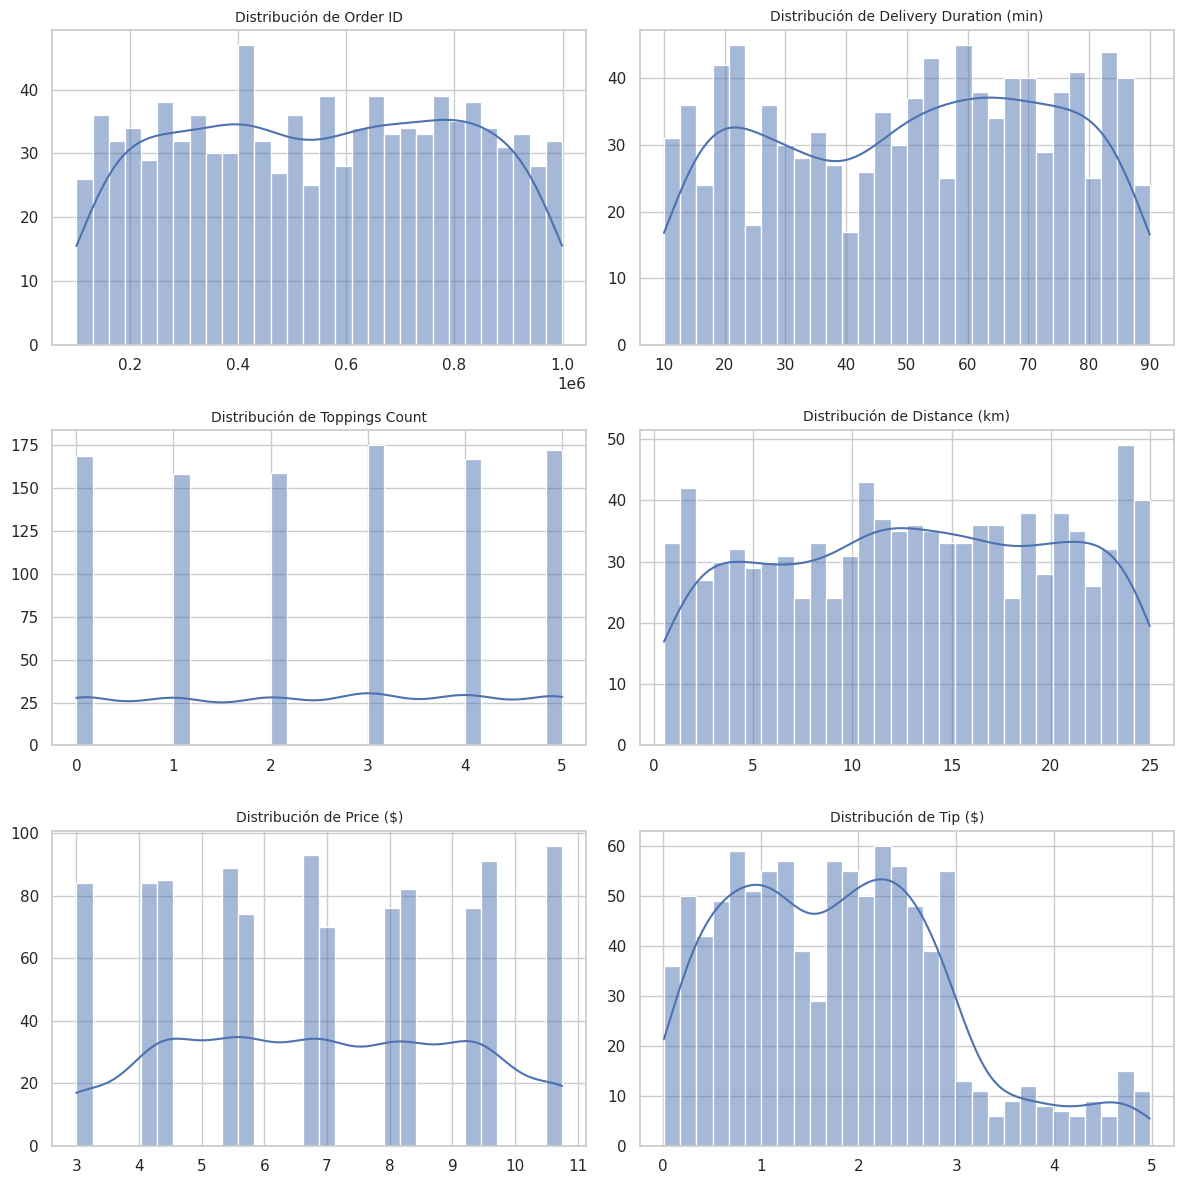

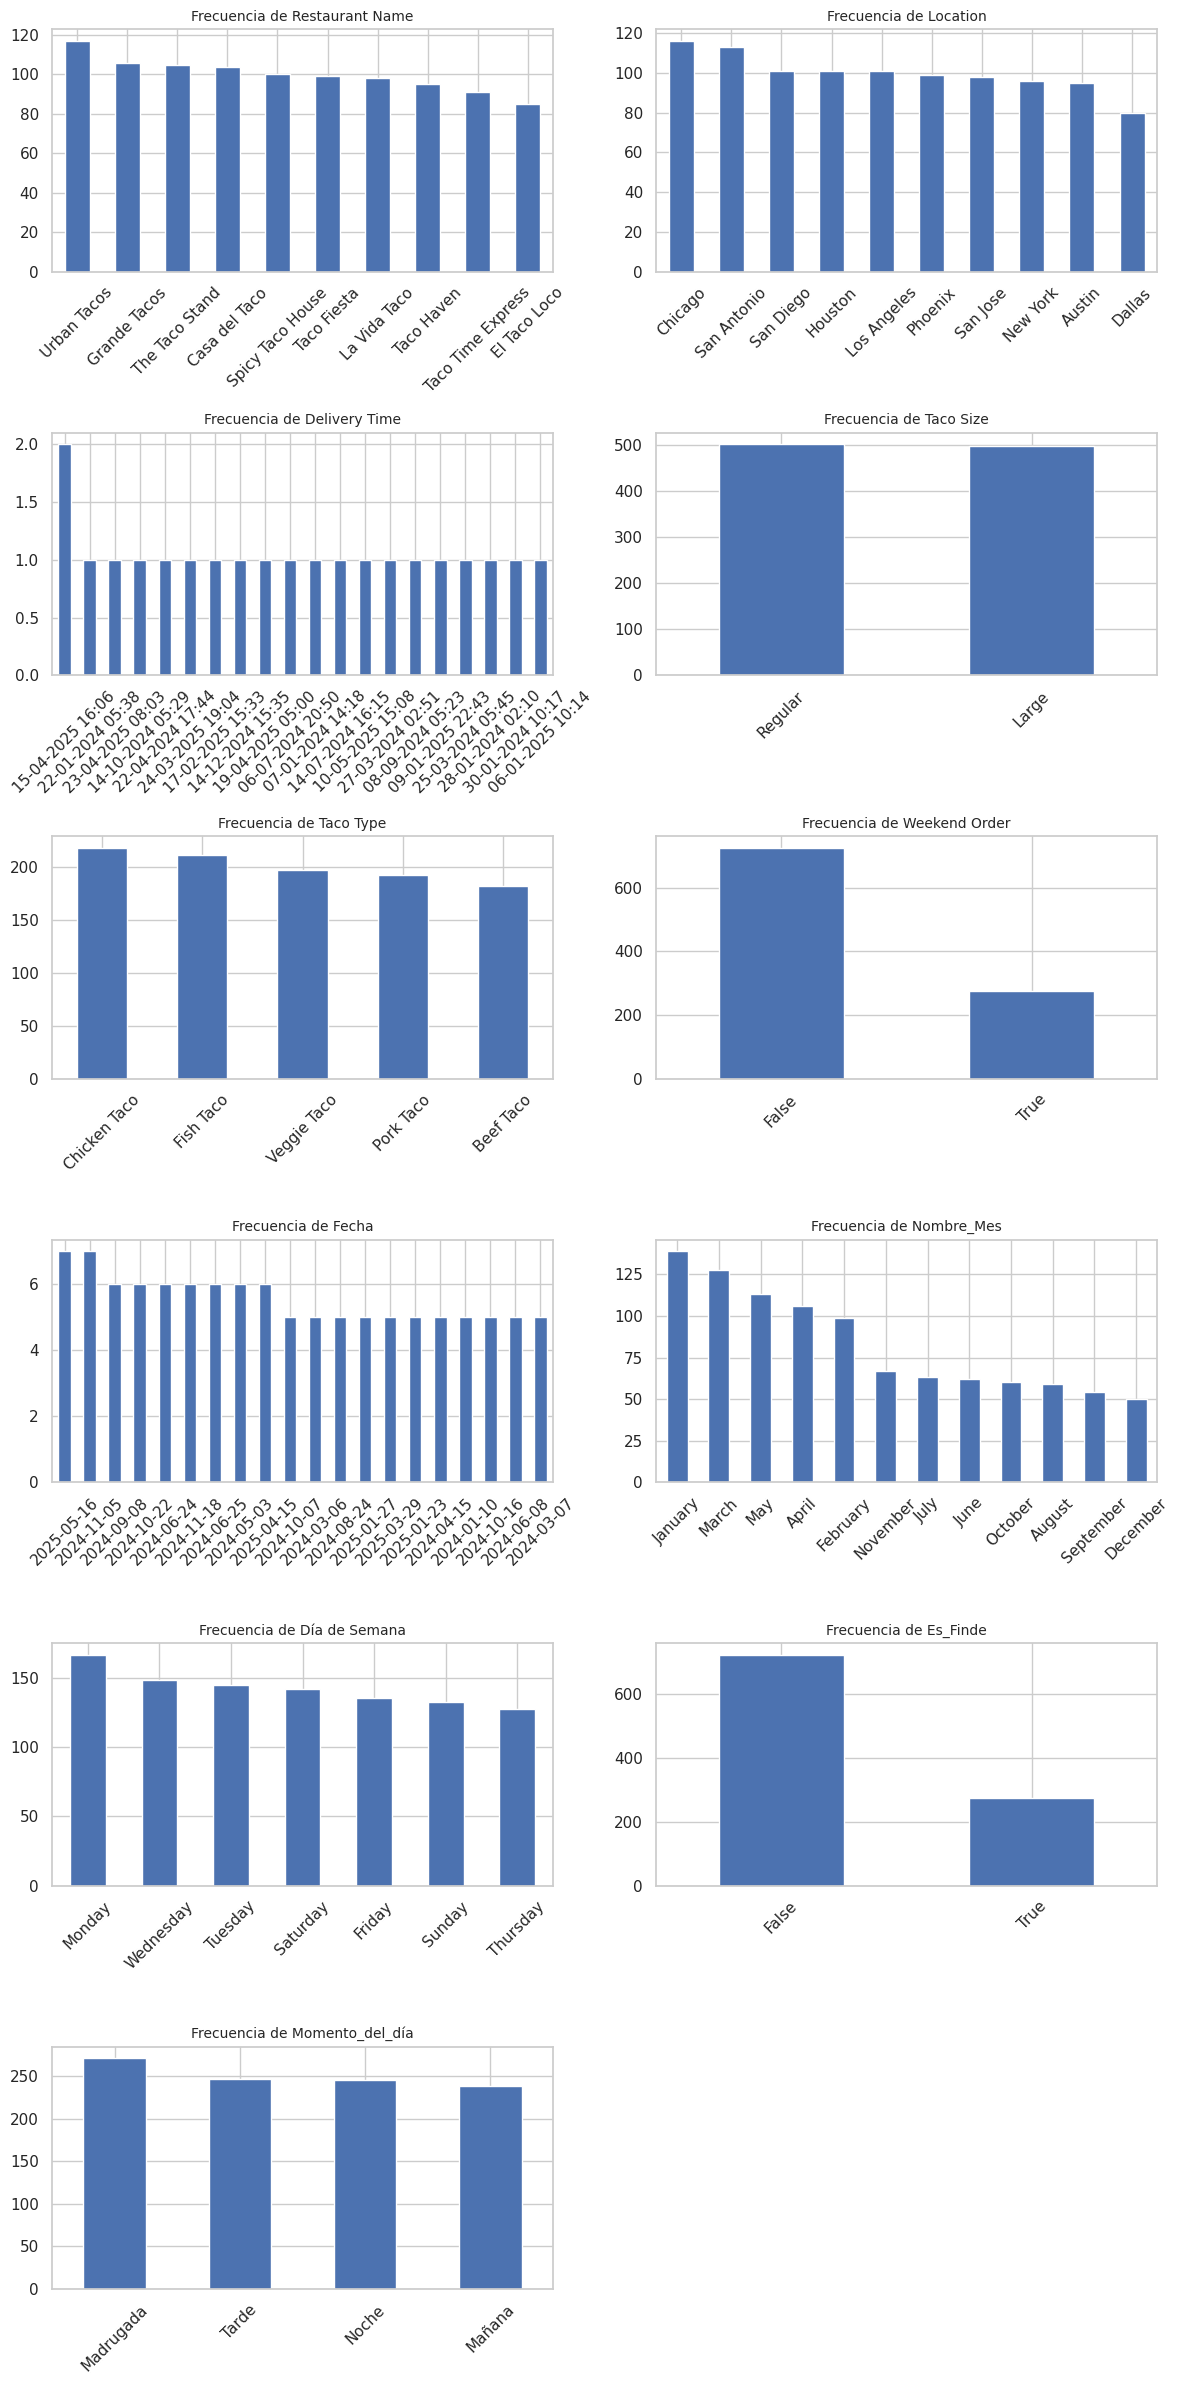

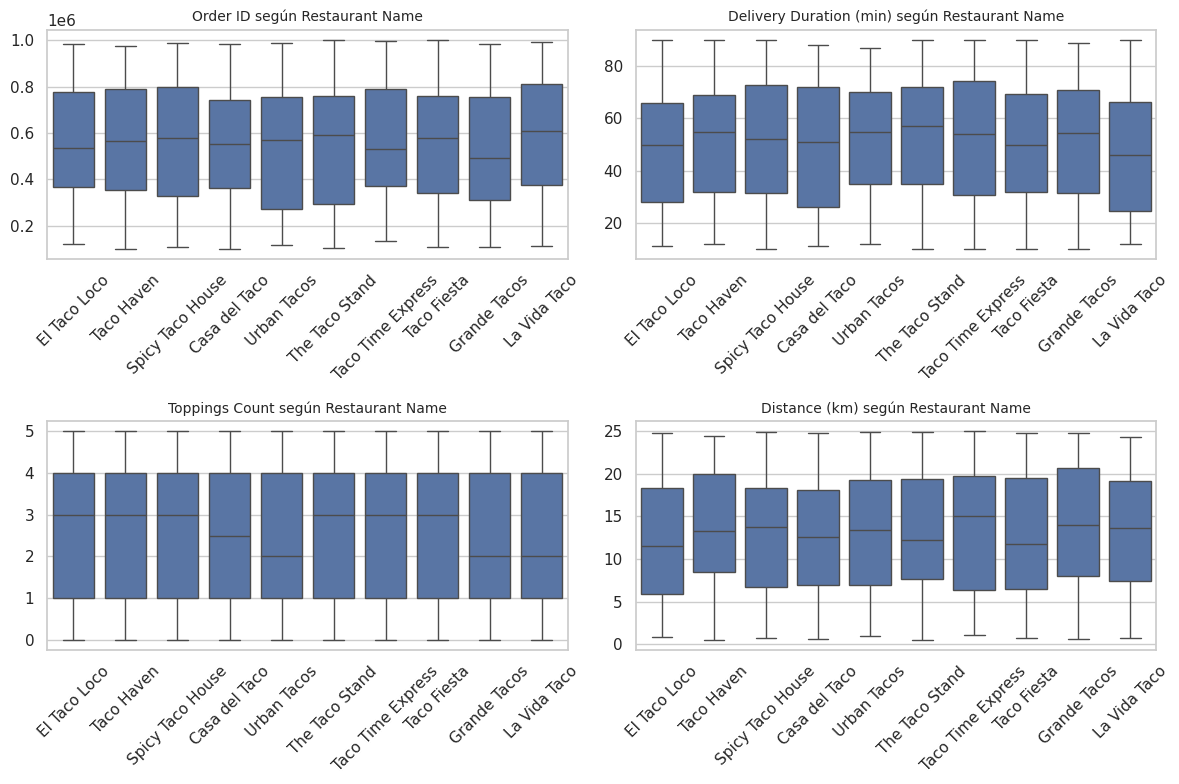

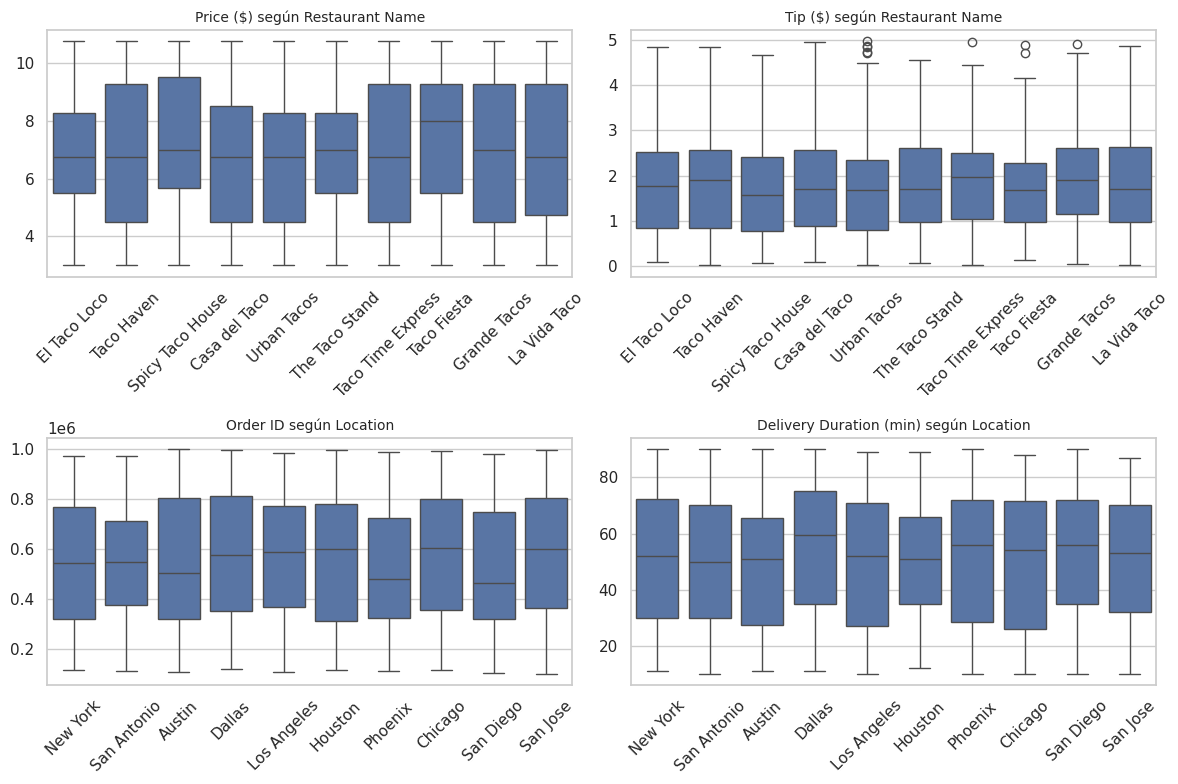

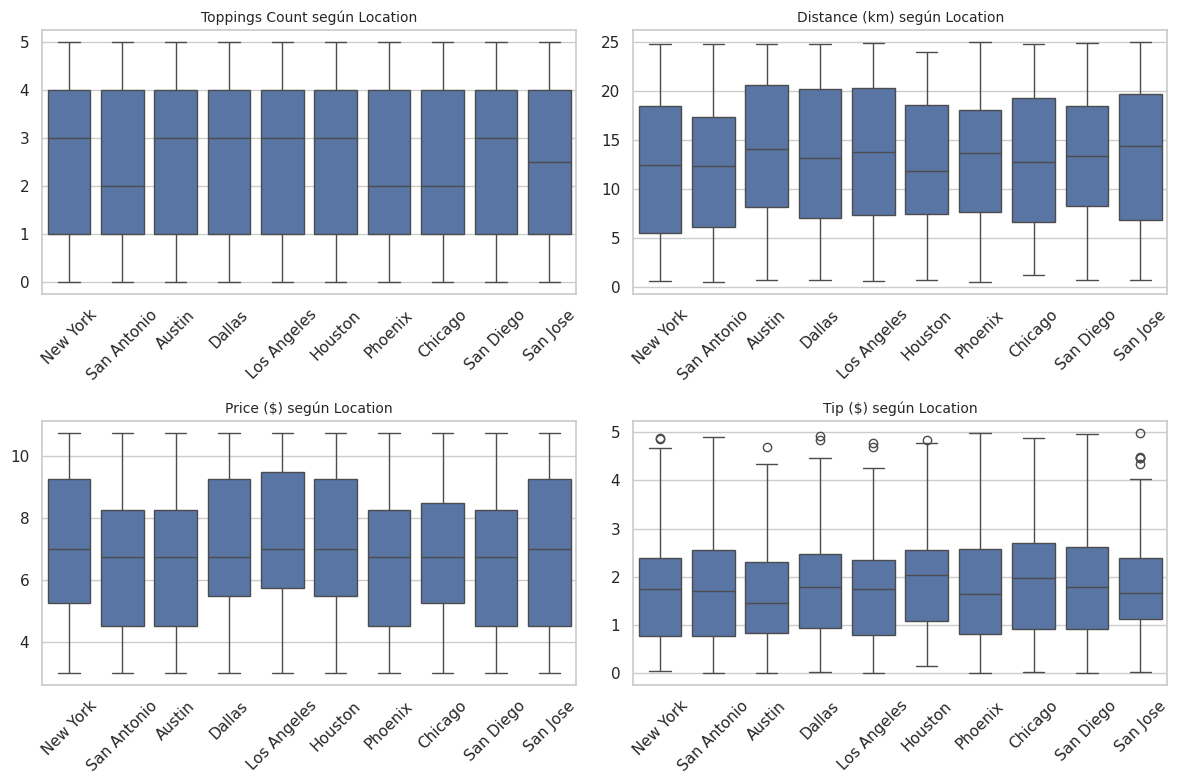

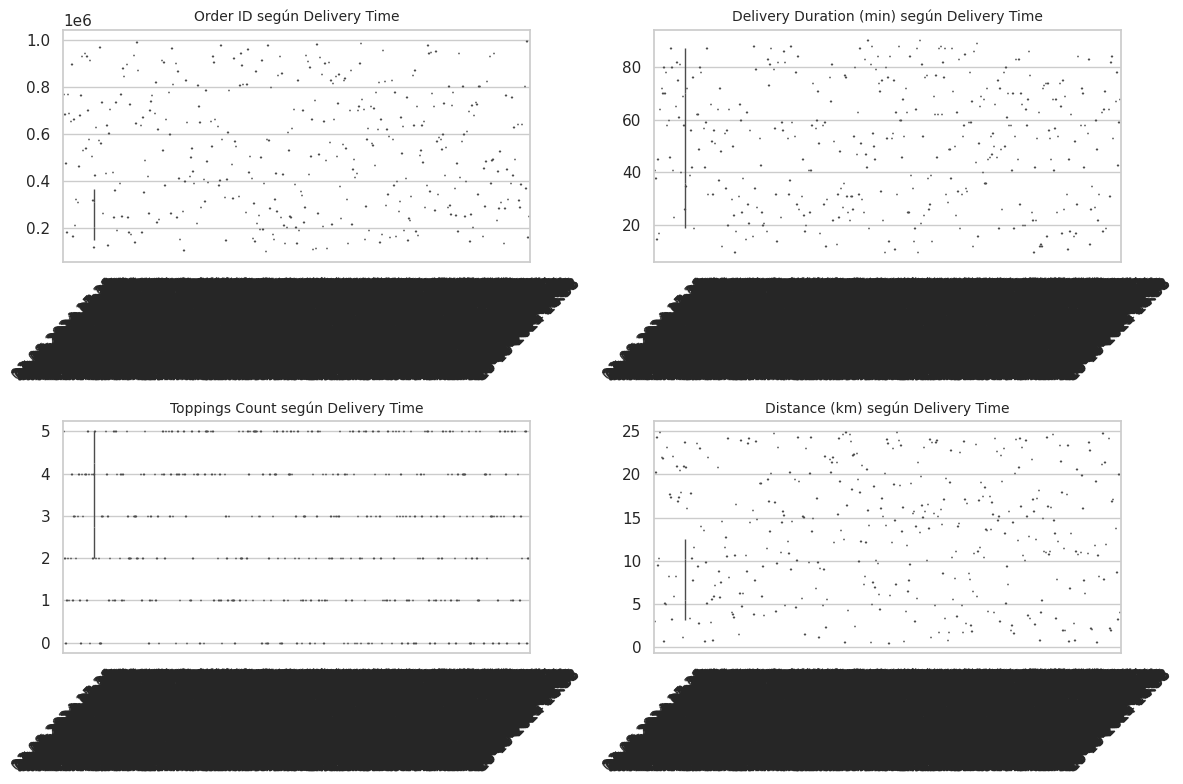

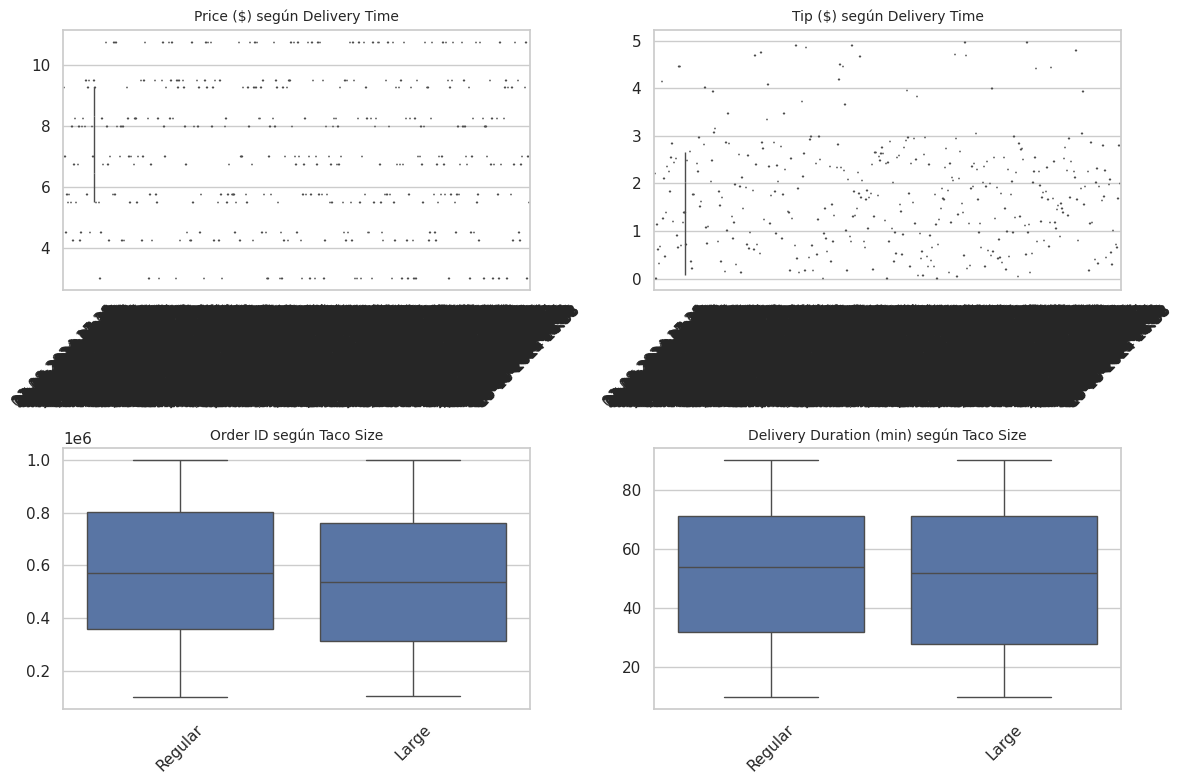

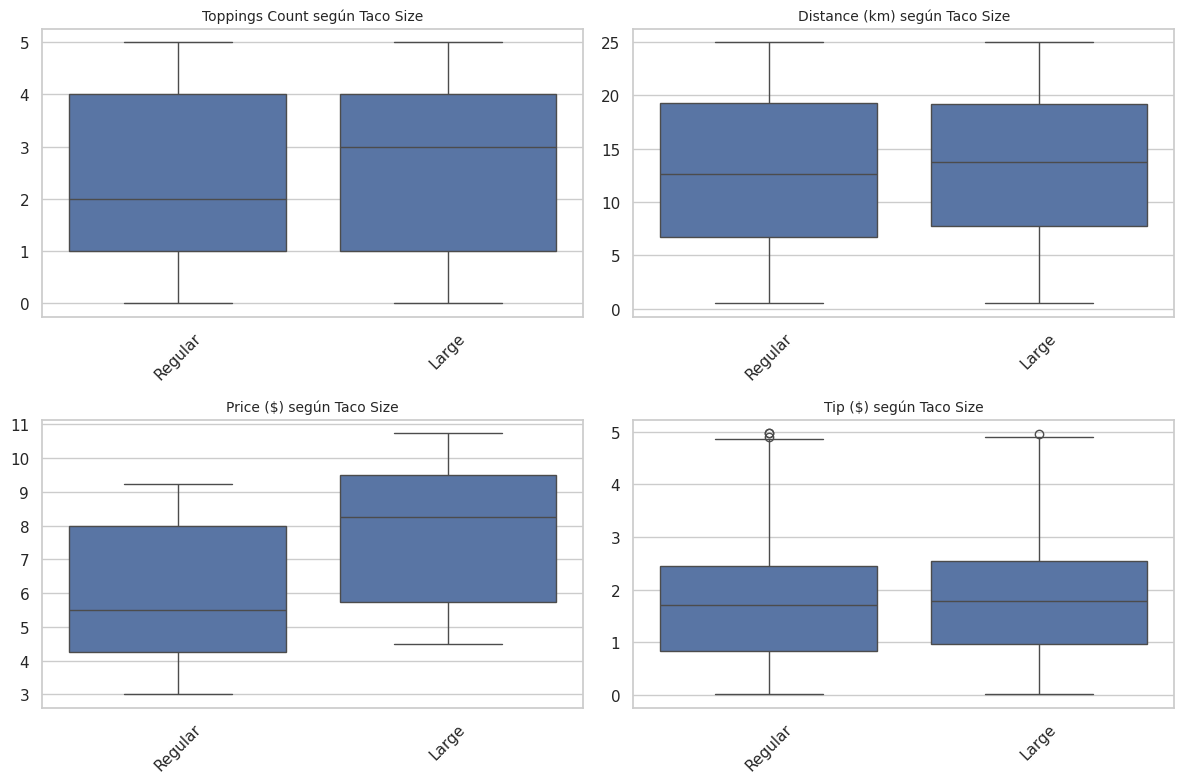

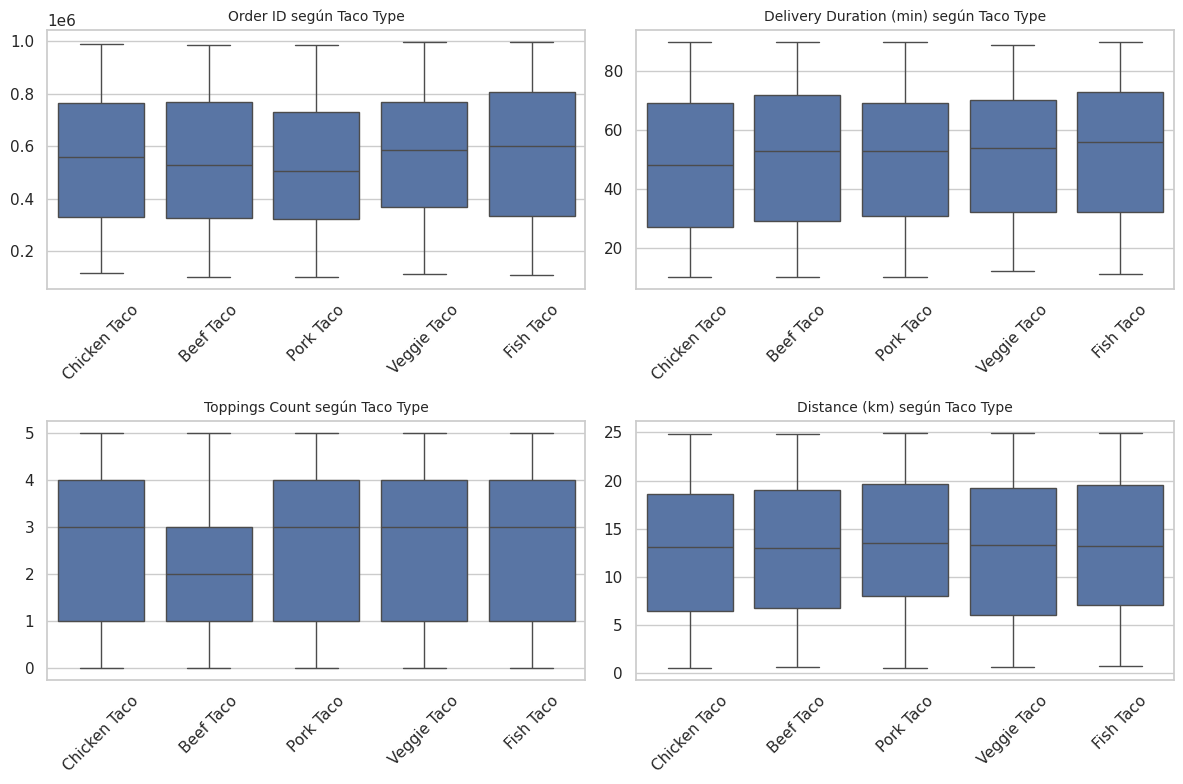

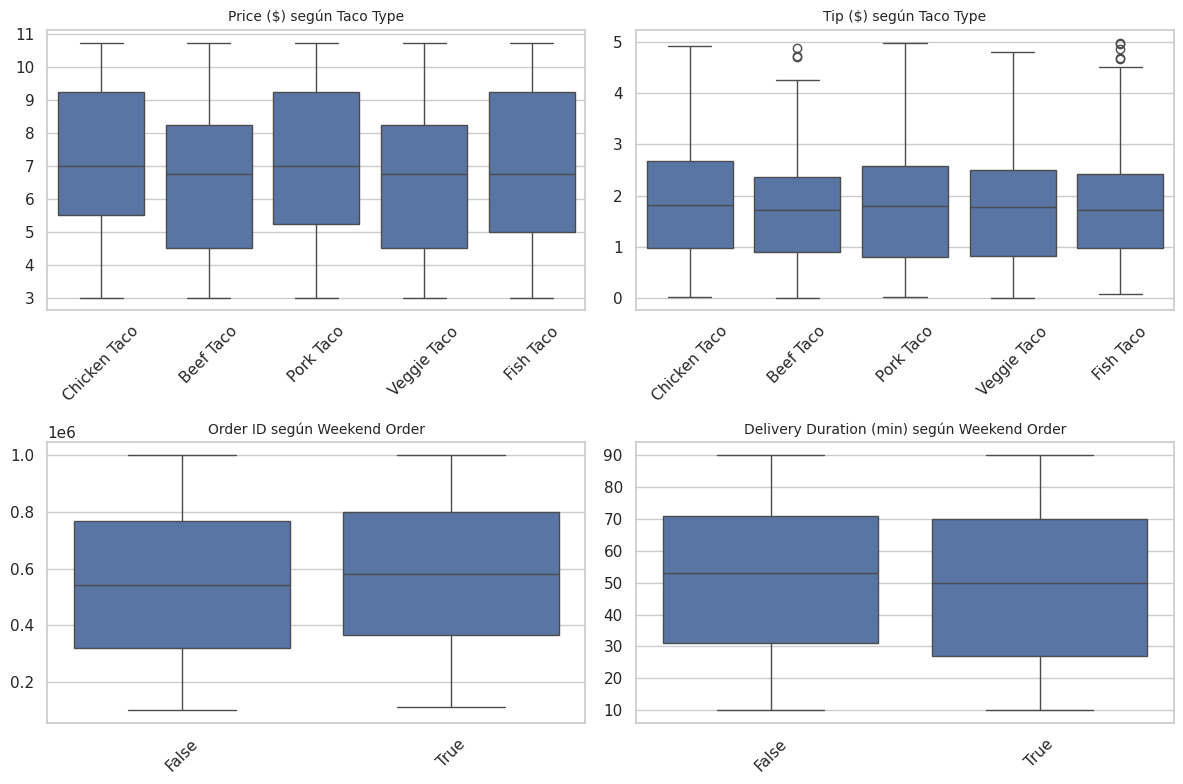

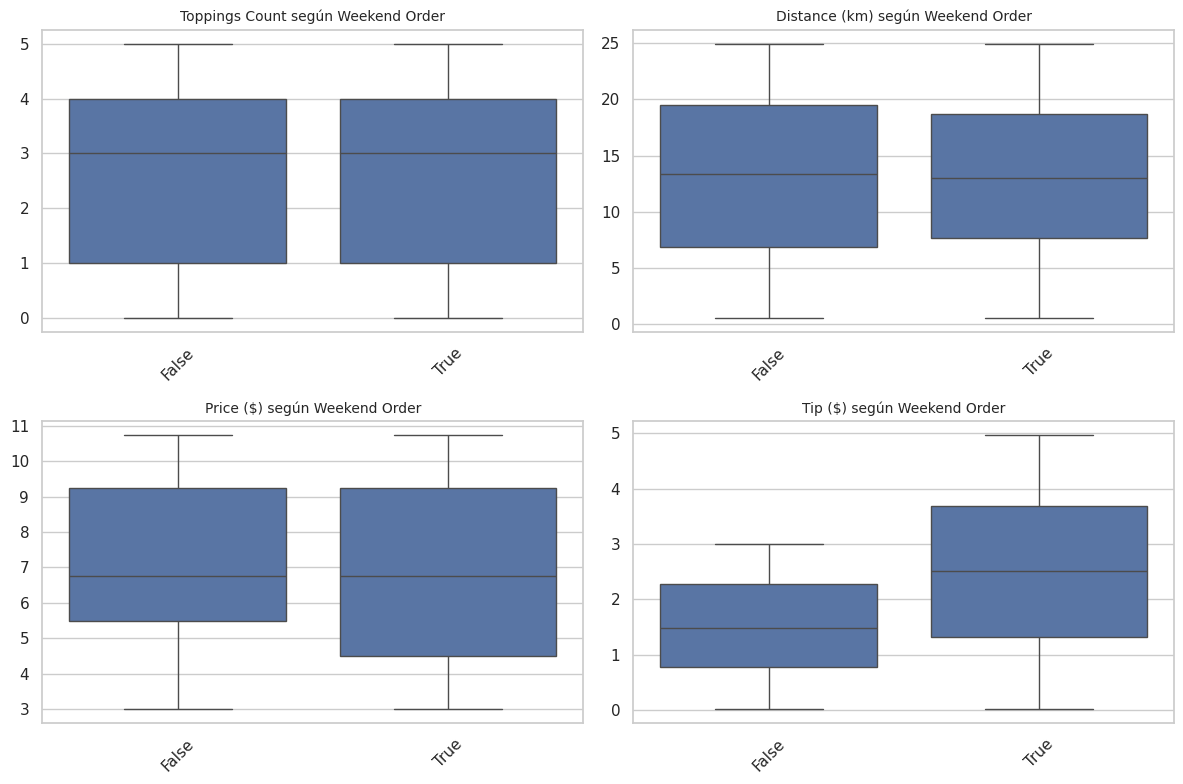

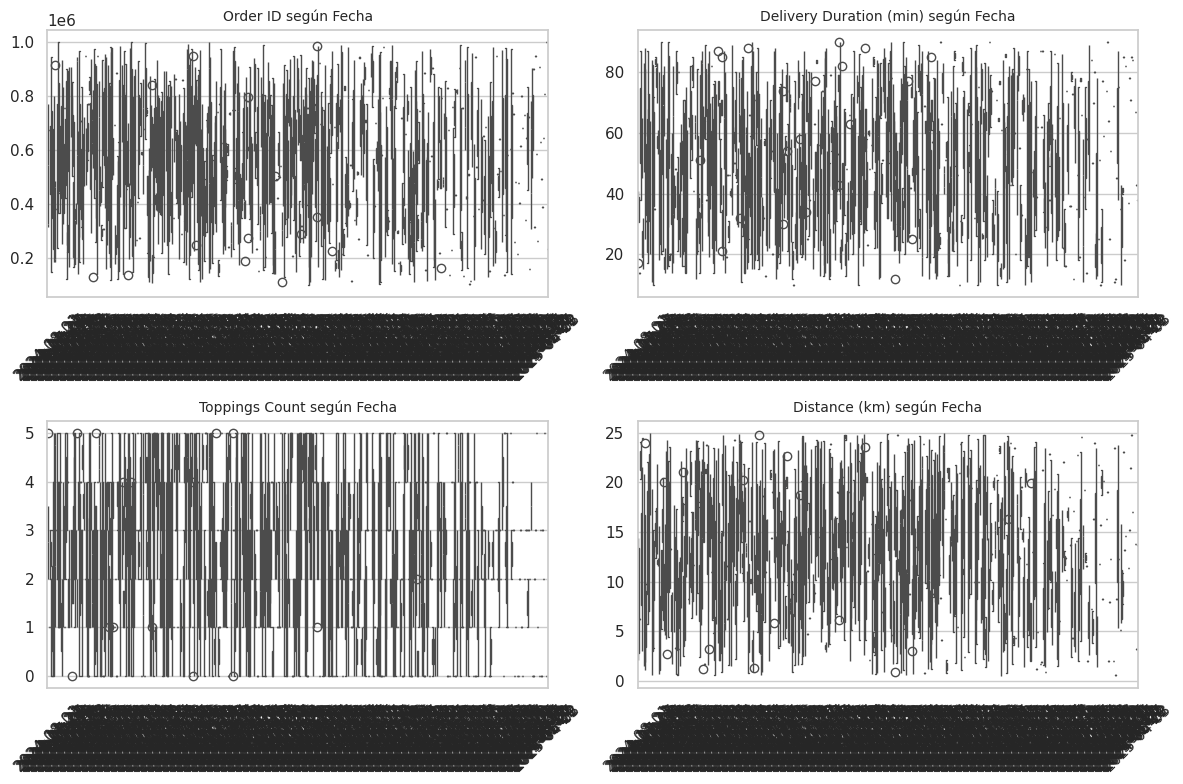

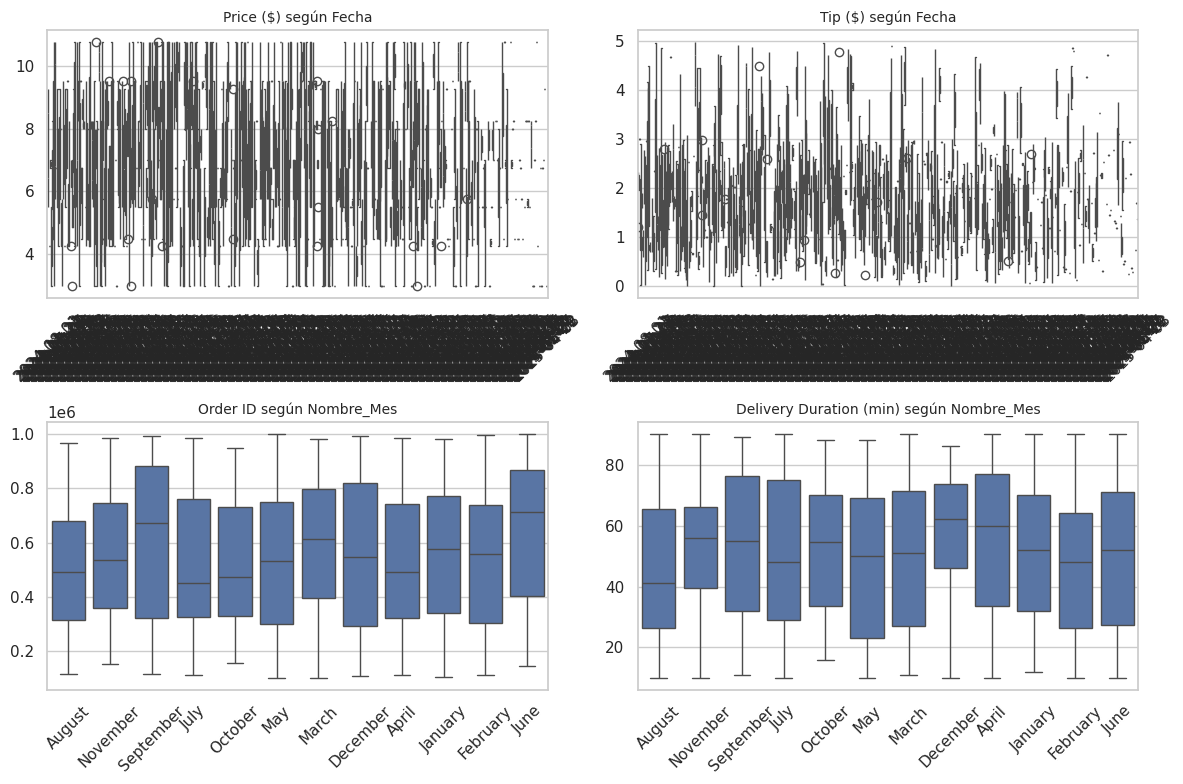

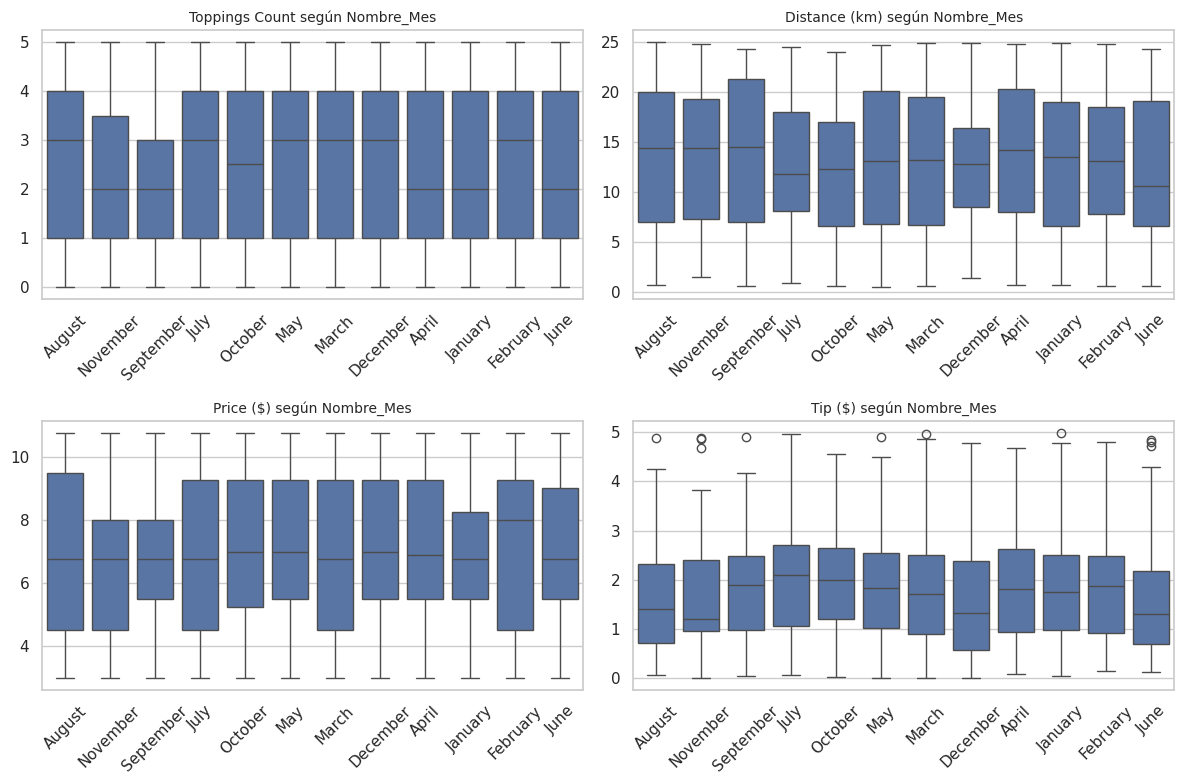

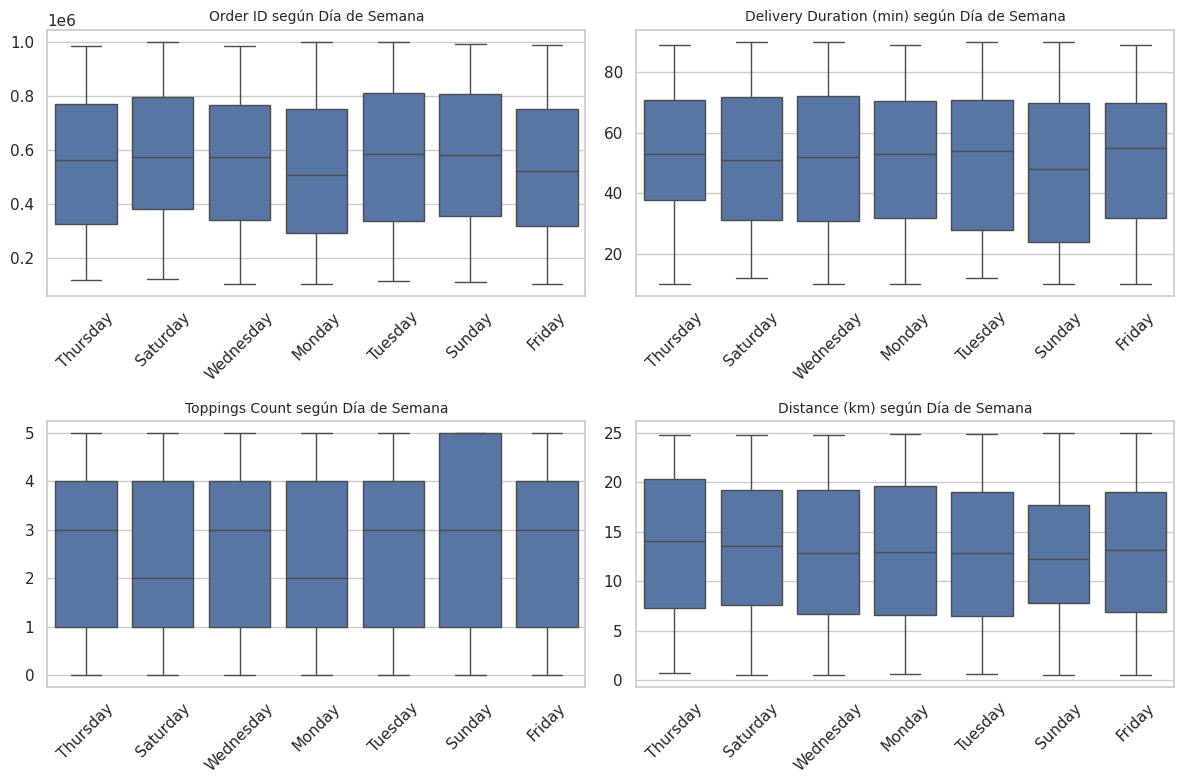

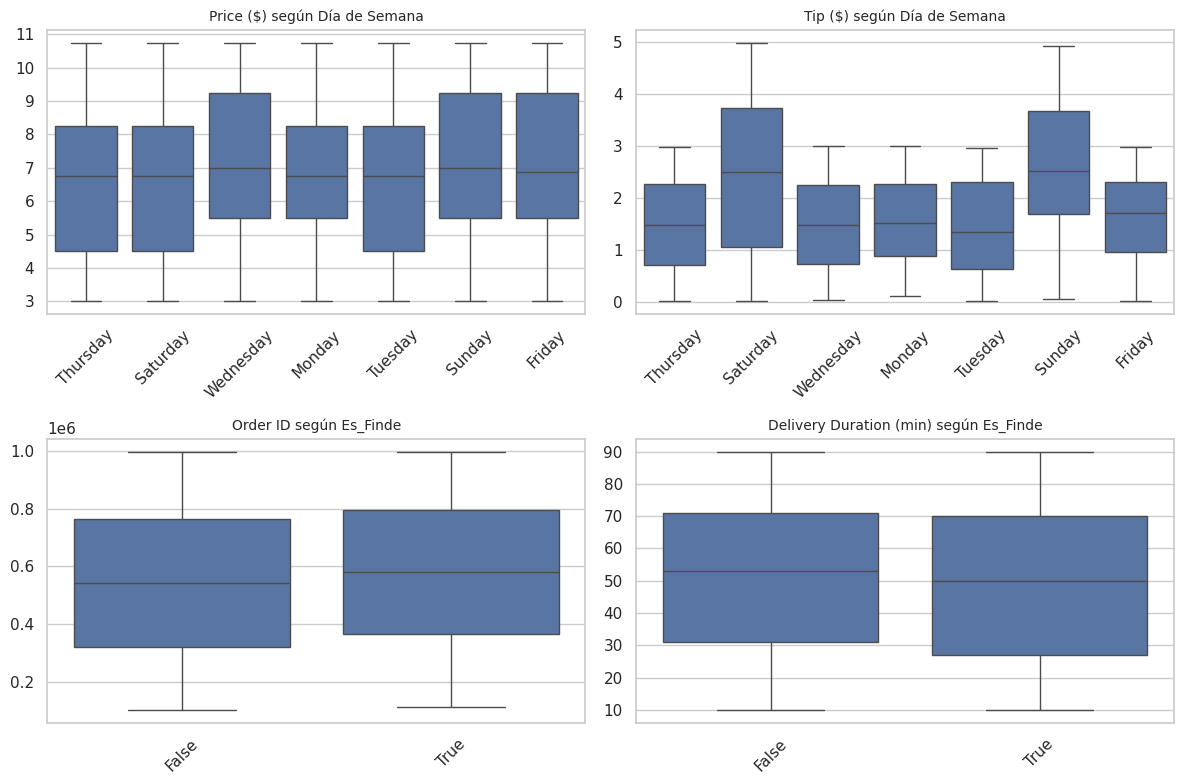

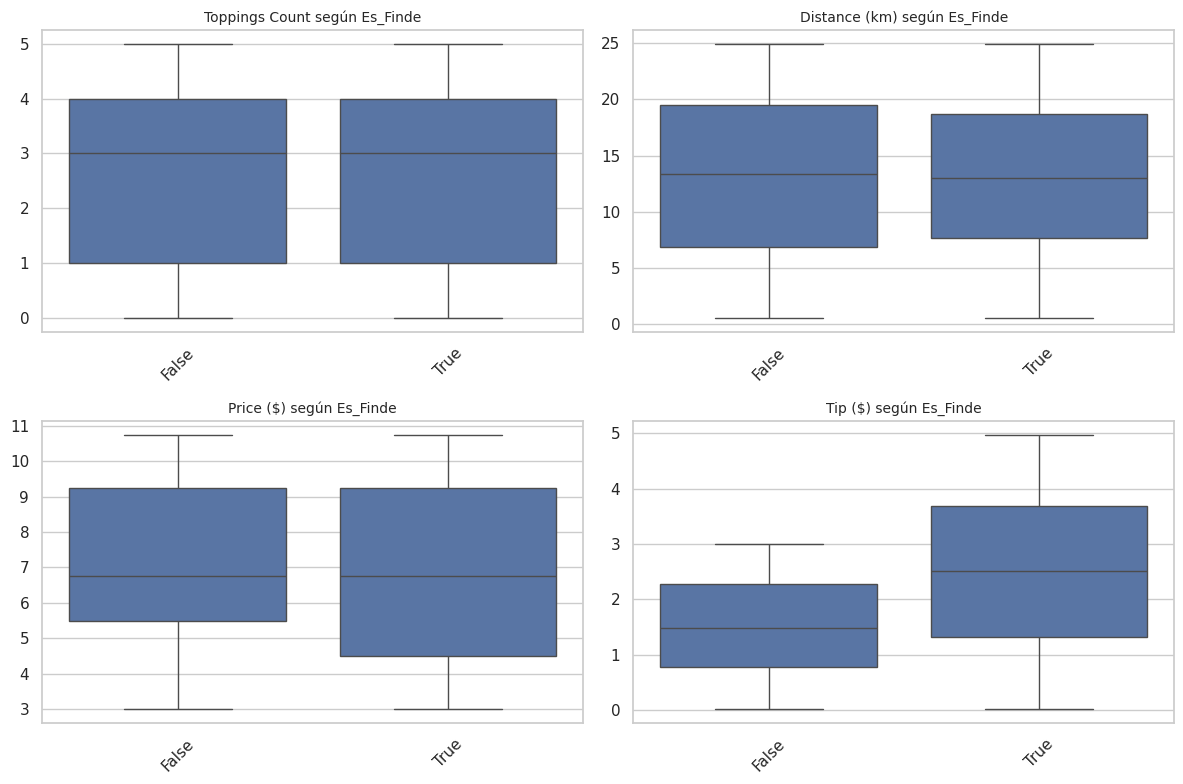

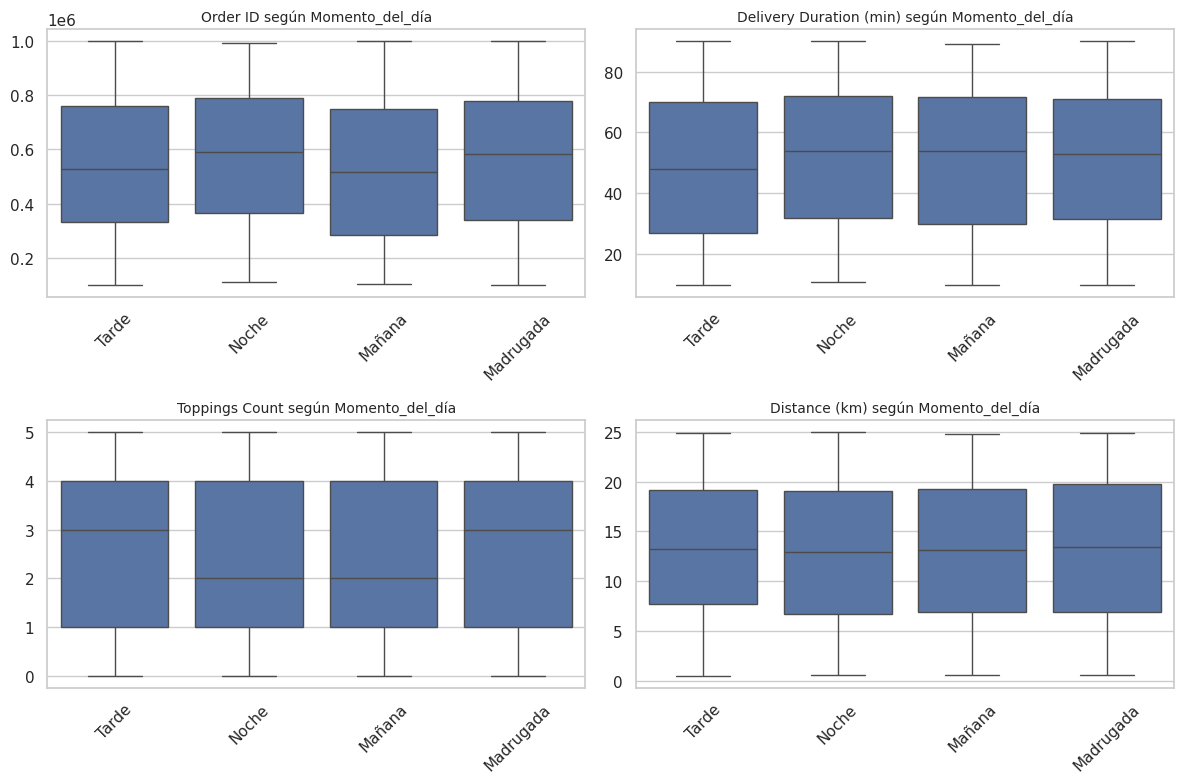

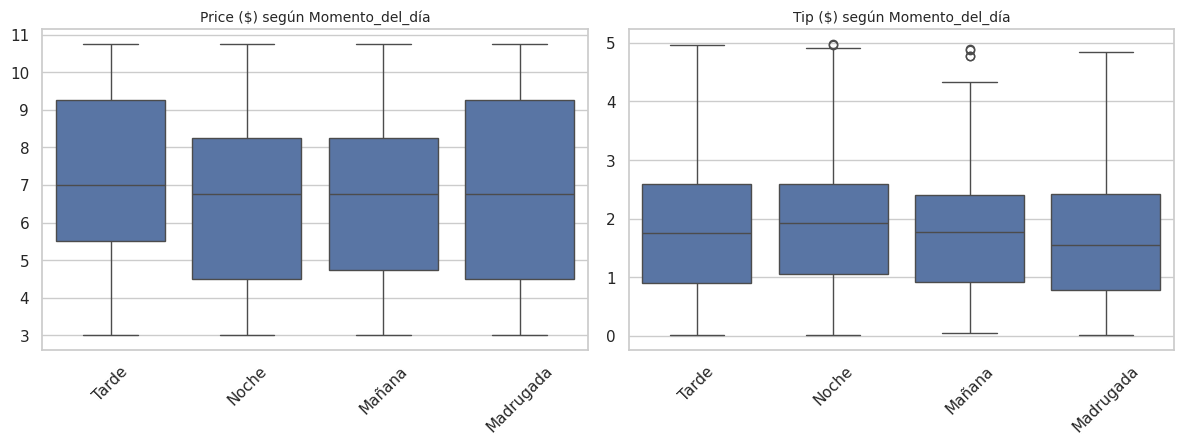

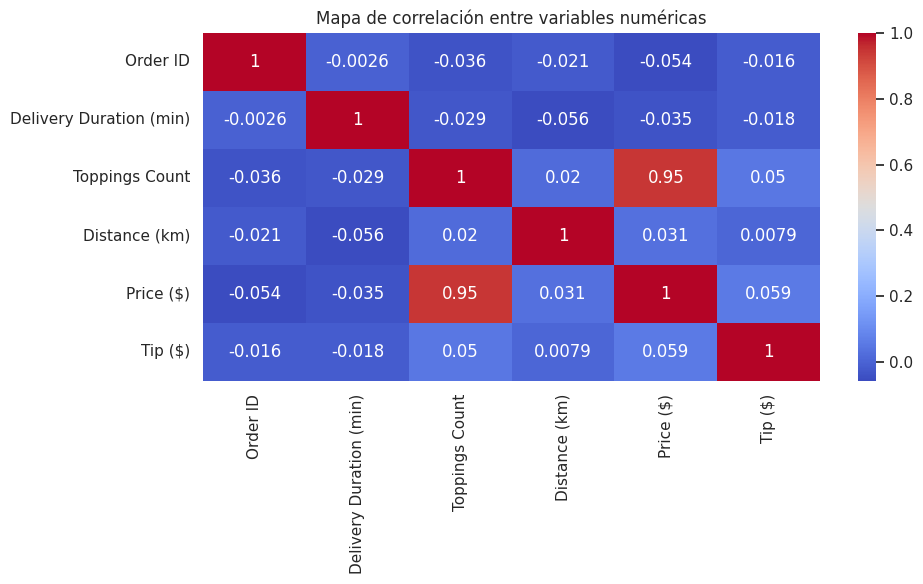

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import math


# Configuración visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)

# Separar variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# 1. HISTOGRAMAS NUMÉRICOS EN GRILLA
def plot_histograms(columns):
    cols = 2
    rows = math.ceil(len(columns) / cols)
    for i in range(0, len(columns), cols * rows):
        subset = columns[i:i + cols * rows]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, col in enumerate(subset):
            sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[j])
            axes[j].set_title(f'Distribución de {col}', fontsize=10)
            axes[j].set_xlabel('')
            axes[j].set_ylabel('')

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 2. BARRAS CATEGÓRICAS EN GRILLA
def plot_bars(columns):
    cols = 2
    rows = math.ceil(len(columns) / cols)
    for i in range(0, len(columns), cols * rows):
        subset = columns[i:i + cols * rows]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, col in enumerate(subset):
            df[col].value_counts().head(20).plot(kind='bar', ax=axes[j])
            axes[j].set_title(f'Frecuencia de {col}', fontsize=10)
            axes[j].tick_params(axis='x', rotation=45)
            axes[j].set_xlabel('')
            axes[j].set_ylabel('')

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 3. BOXPLOTS NUMÉRICO VS CATEGÓRICO EN GRILLA
def plot_boxplots(categorical_cols, numeric_cols):
    pairs = [(cat, num) for cat in categorical_cols for num in numeric_cols]
    cols = 2
    rows = 2
    per_page = cols * rows
    for i in range(0, len(pairs), per_page):
        subset = pairs[i:i + per_page]
        fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
        axes = axes.flatten()

        for j, (cat, num) in enumerate(subset):
            try:
                sns.boxplot(x=df[cat], y=df[num], ax=axes[j])
                axes[j].set_title(f'{num} según {cat}', fontsize=10)
                axes[j].tick_params(axis='x', rotation=45)
                axes[j].set_xlabel('')
                axes[j].set_ylabel('')
            except Exception as e:
                axes[j].set_visible(False)

        for j in range(len(subset), len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

# 4. HEATMAP DE CORRELACIÓN
def plot_corr_heatmap():
    if len(numeric_cols) >= 2:
        plt.figure(figsize=(10, 6))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title('Mapa de correlación entre variables numéricas', fontsize=12)
        plt.tight_layout()
        plt.show()

# 📊 Ejecutar todo
plot_histograms(numeric_cols)
plot_bars(categorical_cols)
plot_boxplots(categorical_cols, numeric_cols)
plot_corr_heatmap()


# Regresion

### Comparación de Modelos de Regresión

Se evaluaron diferentes modelos de regresión lineal para medir su desempeño.
El modelo Ridge mostro la mejor capacidad predictiva, con un R2 promedio cercano al 0.89 y bajo error medio cuadrático.
Podemos entender que el modelo explica bien la variabilidad del precio usando las variables seleccionadas y es robusto frente a la variabilidad del conjunto de datos.



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd


X = df_reg[features]
y = df_reg['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

results = []

for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Modelo': name, 'MSE': mse, 'R²': r2})

results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)


       Modelo       MSE        R²
1       Ridge  0.559030  0.889677
0      Linear  0.559113  0.889661
3  ElasticNet  0.852145  0.831832
2       Lasso  0.867871  0.828729


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Hora' 'Mes']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Hora' 'Mes']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### Grafico Comparativo de los Modelos de Regresion Lineal

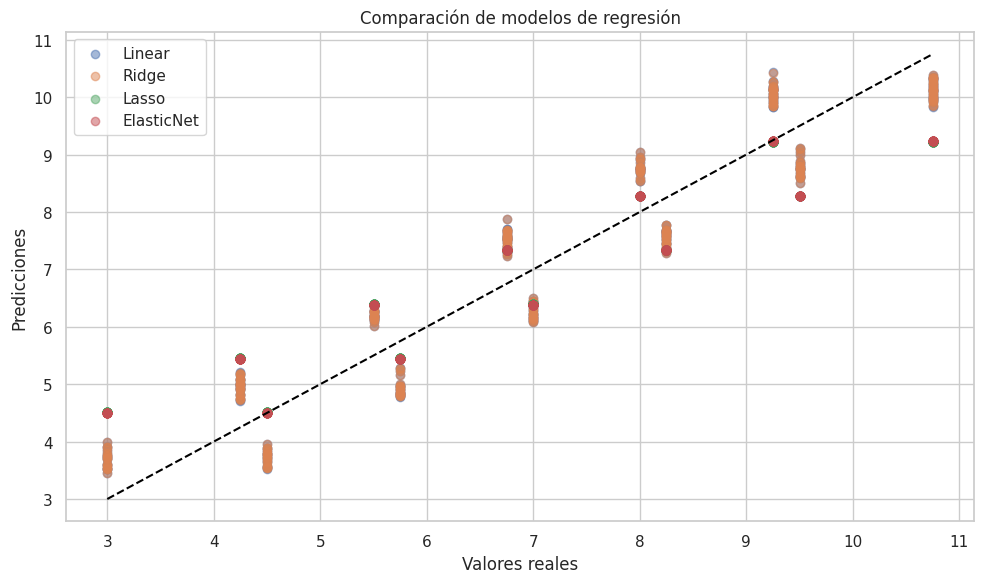

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for nombre, modelo in models.items():
    y_pred = modelo.predict(X_test_imputed)
    plt.scatter(y_test, y_pred, alpha=0.5, label=nombre)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de modelos de regresión')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Grafico de Prediccion VS Real y Grafico de Residuos

NaNs in X_train before imputation: 1400
NaNs in X_test before imputation: 600
Imputing NaNs in X_train and X_test...
NaNs in X_train after imputation: 0
NaNs in X_test after imputation: 0


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Hora' 'Mes']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Hora' 'Mes']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


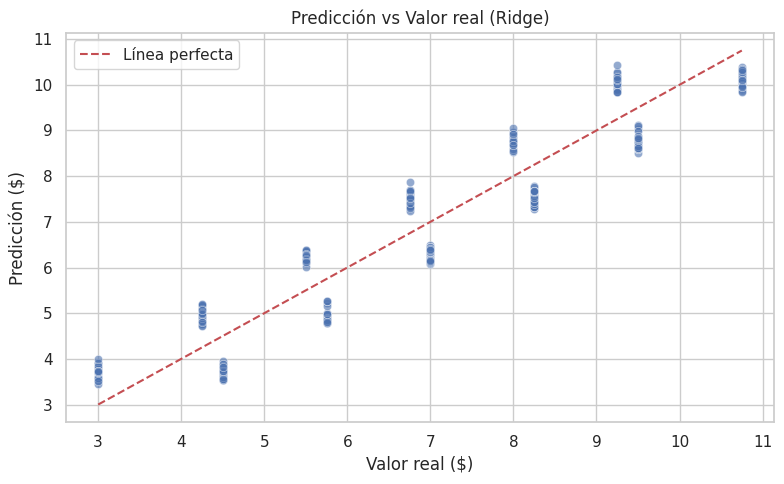

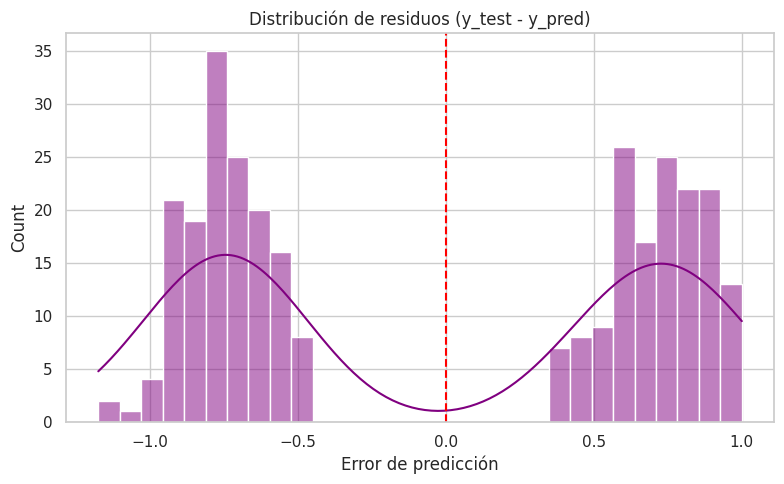

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer # Import SimpleImputer
import pandas as pd # Import pandas for isnull() and DataFrame


# Ensure X_train, y_train, X_test, y_test are available from the previous cell (jv8LPpEwMV9N)

# Check and impute NaNs in X_train and X_test if they exist
print("NaNs in X_train before imputation:", pd.DataFrame(X_train).isnull().sum().sum())
print("NaNs in X_test before imputation:", pd.DataFrame(X_test).isnull().sum().sum())

if pd.DataFrame(X_train).isnull().sum().sum() > 0 or pd.DataFrame(X_test).isnull().sum().sum() > 0:
    print("Imputing NaNs in X_train and X_test...")
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
else:
    X_train_imputed = X_train
    X_test_imputed = X_test

print("NaNs in X_train after imputation:", pd.DataFrame(X_train_imputed).isnull().sum().sum())
print("NaNs in X_test after imputation:", pd.DataFrame(X_test_imputed).isnull().sum().sum())


# 1. Entrenar Ridge con los datos finales
ridge = Ridge()
ridge.fit(X_train_imputed, y_train)
y_pred = ridge.predict(X_test_imputed)
residuals = y_test - y_pred

# 2. Predicción vs Real
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea perfecta')
plt.xlabel('Valor real ($)')
plt.ylabel('Predicción ($)')
plt.title('Predicción vs Valor real (Ridge)')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Gráfico de residuos
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribución de residuos (y_test - y_pred)')
plt.xlabel('Error de predicción')
plt.tight_layout()
plt.show()

### Validacion Cruzada

In [51]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline # Import Pipeline
import pandas as pd # Import pandas to check for NaNs

# 1. Define the model and imputer
imputer = SimpleImputer(strategy='mean')
ridge = Ridge()

# 2. Create a Pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('model', ridge)
])

# Ensure X and y are available from the previous cell (jv8LPpEwMV9N)
# Let's also check NaNs in the original X used for the pipeline input just in case
print("NaNs in X before passing to pipeline for cross-validation:", pd.DataFrame(X).isnull().sum().sum())


# 3. Cross-validation k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Metric: R²
r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print("R² por fold:", r2_scores)
print("Promedio R²:", r2_scores.mean())

# 5. Metric: MSE (se devuelve negativo, hay que multiplicar por -1)
mse_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # lo hacemos positivo
print("\nMSE por fold:", mse_scores)
print("Promedio MSE:", mse_scores.mean())

NaNs in X before imputation for cross-validation: 2000
NaNs in X after imputation for cross-validation: 0
R² por fold: [0.88543178 0.90208819 0.90534505 0.88169675 0.88512239]
Promedio R²: 0.8919368345311923

MSE por fold: [0.56410509 0.55978875 0.56116835 0.59872071 0.55802497]
Promedio MSE: 0.5683615747440693


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Hora' 'Mes']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### Grafico Validacion Cruzada

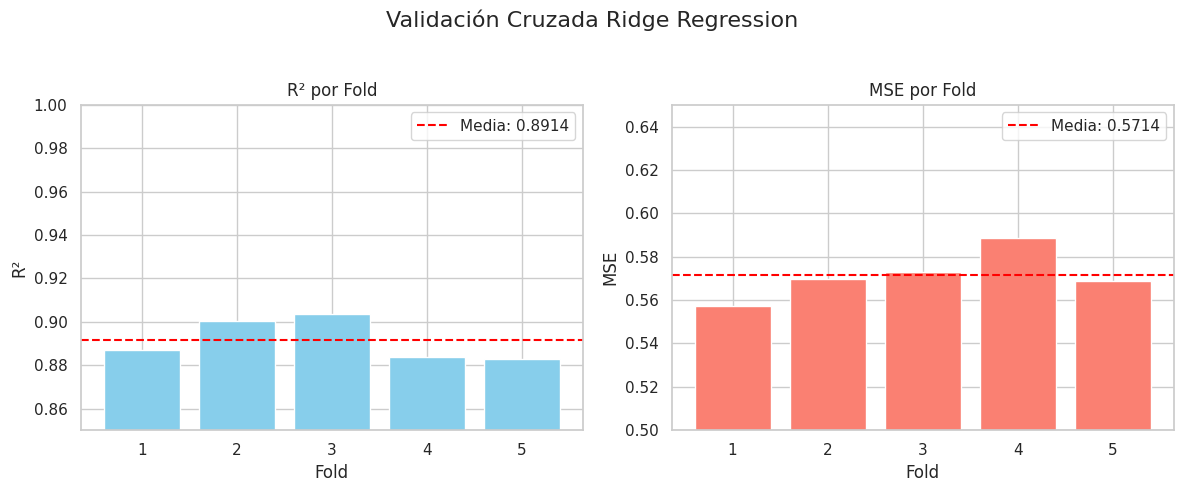

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados (ejemplo con tus datos)
r2_scores = np.array([0.8867899, 0.90036919, 0.90338411, 0.8836605, 0.88293954])
mse_scores = np.array([0.55741803, 0.56961671, 0.57279397, 0.5887824, 0.56862832])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico R²
axs[0].bar(range(1, 6), r2_scores, color='skyblue')
axs[0].set_title('R² por Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('R²')
axs[0].set_ylim([0.85, 1])
axs[0].axhline(r2_scores.mean(), color='red', linestyle='--', label=f'Media: {r2_scores.mean():.4f}')
axs[0].legend()

# Gráfico MSE
axs[1].bar(range(1, 6), mse_scores, color='salmon')
axs[1].set_title('MSE por Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MSE')
axs[1].set_ylim([0.5, 0.65])
axs[1].axhline(mse_scores.mean(), color='red', linestyle='--', label=f'Media: {mse_scores.mean():.4f}')
axs[1].legend()

plt.suptitle('Validación Cruzada Ridge Regression', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#  Conclusión del modelo de regresión
Luego de comparar diferentes modelos de regresión lineal (Linear, Ridge, Lasso y ElasticNet), el modelo Ridge Regression demostró ser el más eficiente para predecir el precio de los tacos (Price ($)) a partir de variables como:

Cantidad de toppings

Distancia de entrega

Propina

Duración del delivery

Hora y mes del pedido

Localización y momento del día (como variables categóricas codificadas)

El rendimiento del modelo fue evaluado con métricas de error y poder explicativo, obteniendo:

R² promedio en validación cruzada (5 folds): 0.89
→ El modelo explica aproximadamente el 89% de la variabilidad en el precio.

MSE promedio: alrededor de 0.57
→ Los errores de predicción son bajos y consistentes entre los pliegues.

Además, los gráficos de residuos muestran una distribución aproximadamente normal, centrada en cero, lo que indica que no hay sesgos sistemáticos en las predicciones.

En resumen, el modelo Ridge ofrece predicciones precisas y generalizables, siendo una herramienta confiable para estimar el precio de los pedidos a partir de información operativa del sistema de ventas.

# Clasificacion